---
# Préparation des Données

---

Pour préparer adéquatement les données avant de les fournir à un ou plusieurs algorithmes d'apprentissage automatique, il faut également s'assurer de la bonne représentation de ces données pour ne pas leur fournir de valeurs trop différentes qu'ils ne pourraient manipuler conjointement.

<center><img src="./img/mlprocess_2.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

1. Le nettoyage et les aberrations statistiques.
2. L'imputation de données manquantes.
3. Équilibrage de données déséquilibrées.
4. **Transformation des caractéristiques**
    1. *rescaling* et *normalizing* (\[0, 1\] ou \[-1, 1\]), *standardizing* (loi normale).
    2. Représentation matricielle de données catégorisées.
    3. Réduction de la dimensionnalité ou création de caractéristiques.





## 4. Transformation des données

### Rééchelonnage ou normalisation

Séquence inspirée des exemples de code de la librairie Scikit-Learn de [Raghav RV](mailto:rvraghav93@gmail.com), [Guillaume Lemaitre](mailto:g.lemaitre58@gmail.com) et Thomas Unterthiner (License: BSD 3 clause)

Le code ci-dessous sert à afficher les graphiques joliment.


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

print(__doc__)

cmap = getattr(cm, 'jet_r', cm.jet_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # Définition des axes pour la première figure.
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # Définition des axes pour la zone agrandie.
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # Définition des axes pour la barre de couleurs.
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # Diagramme de points
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Histogramme pour l'axe X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal', color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogramme pour l'axe X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical', color='grey', ec='grey')
    hist_X0.axis('off')

def make_plot(title, X):
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Revenu médian",
                      x1_label="Nombre d'occupants",
                      title="Données complètes")

    # Élimination des outliers 
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=200,
                      x0_label="Revenu médian",
                      x1_label="Nombre d'occupants",
                      title="Sans outliers")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Valeur de la maison *100 K$')



Automatically created module for IPython interactive environment


#### Données brutes

Si on ne touche à rien, cela donne ceci:

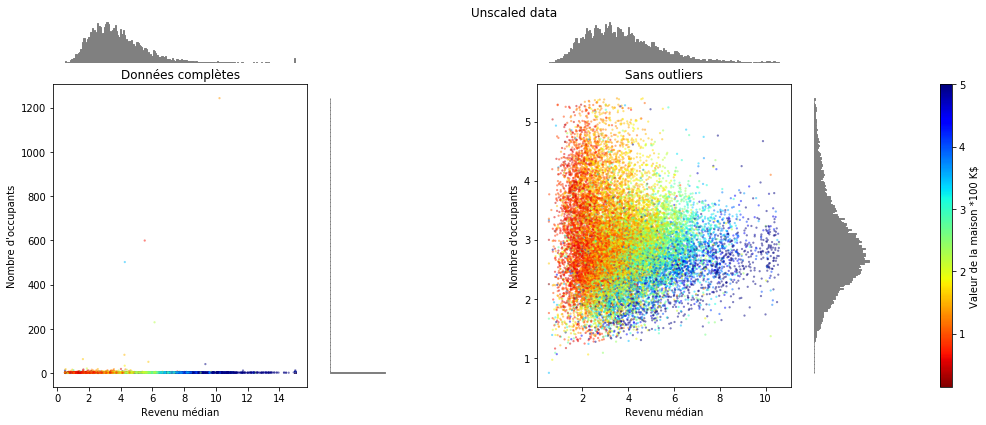

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import minmax_scale
# Données des maisons californiennes : La valeur à prédire est la valeur de la maison en centaine de milliers de dollars US
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
#print(dataset.DESCR)
# On ne prends que 2 caractéristiques pour faciliter la visualisation : la composante #0 a une distribution 'heavy-tailed', et la #5 a quelques données aberrantes très prononcées
X = X_full[:, [0, 5]]

# On reéchelonne la donnée de sortie entre 0 et 1 pour mieux visualiser la légende (étalement de la couleur)
y = minmax_scale(y_full)

data = ('Unscaled data', X)
make_plot(*data)

#### Standardisation 

Pour rappel : $x_i = \frac{x_i - \bar{x}}{\sigma(x)}$

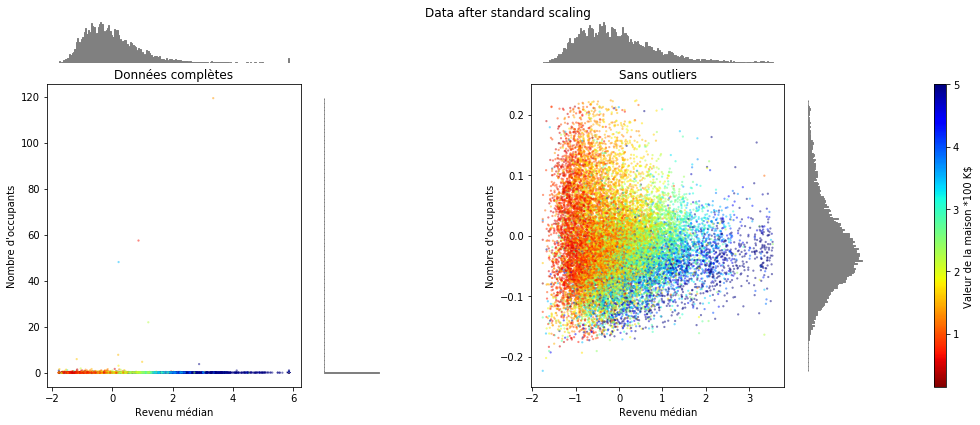

In [3]:
from sklearn.preprocessing import StandardScaler
data = ('Data after standard scaling', StandardScaler().fit_transform(X))
make_plot(*data)

#### Min-Max

Pour rappel : $x_i = \frac{x_i - \min_i{x_i}}{\max_i{x_i}-\min_i{x_i}}$

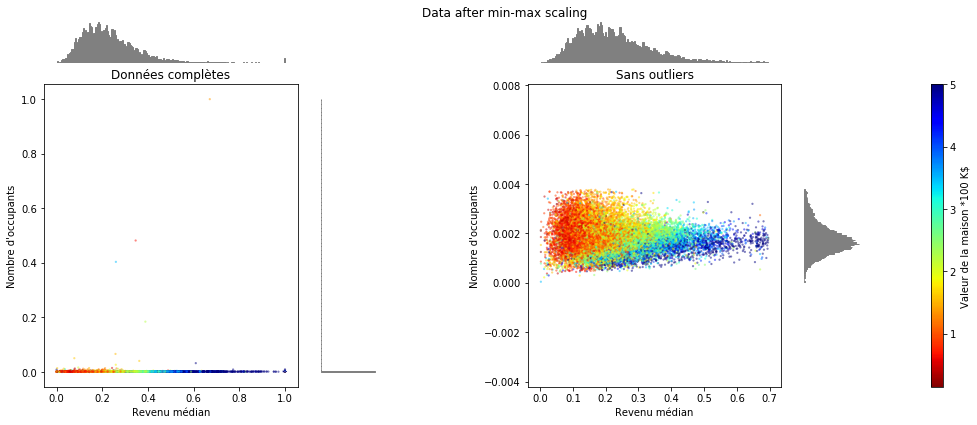

In [4]:
from sklearn.preprocessing import MinMaxScaler
data = ('Data after min-max scaling', MinMaxScaler().fit_transform(X))
make_plot(*data)

#### Max-Abs

Pour rappel : $x_i = \frac{x_i}{\max_i{|x_i|}}$

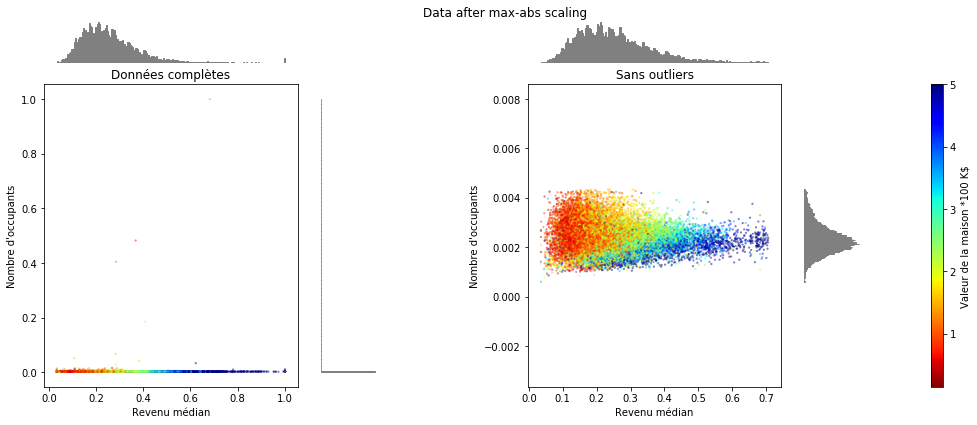

In [5]:
from sklearn.preprocessing import MaxAbsScaler
data = ('Data after max-abs scaling', MaxAbsScaler().fit_transform(X))
make_plot(*data)

#### Robuste (basé sur les quantiles 1 et 3)

Pour rappel : $x_i = \frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$

Le centrage et la mise à l'échelle s'effectuent indépendamment sur chaque caractéristique en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La médiane et l'intervalle interquartile sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la méthode de transformation.

La standardisation est une pratique courante pour de nombreux estimateurs d'apprentissage automatique. Cela se fait généralement en supprimant la moyenne et en divisant par la variance. Cependant, les valeurs aberrantes peuvent souvent influencer négativement la moyenne/variance de l'échantillon. Dans ce cas, la médiane et l’intervalle interquartile donnent souvent de meilleurs résultats.



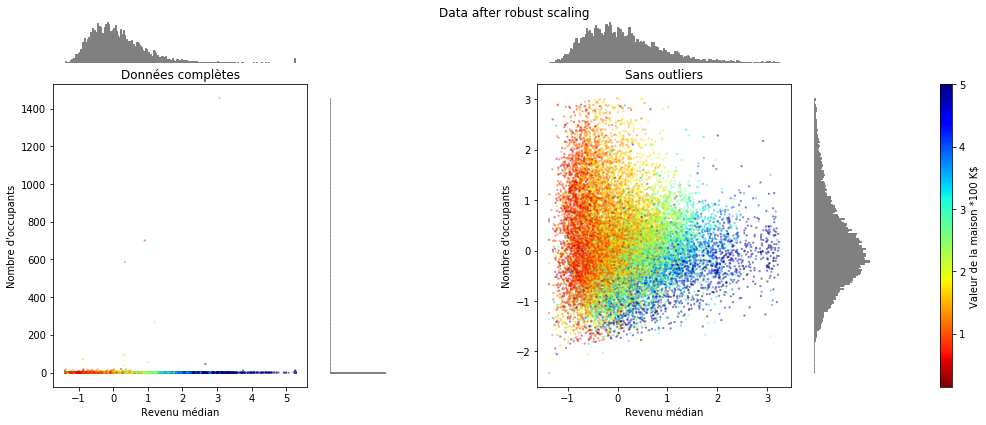

In [6]:
from sklearn.preprocessing import RobustScaler
data = ('Data after robust scaling', RobustScaler(quantile_range=(25, 75)).fit_transform(X))
make_plot(*data)

#### Transformation par puissance

Famille de transformations paramétriques et monotones utilisées afin de transformer une distribution de données arbitraire en une autre approximativement gaussienne. C'est très utile pour traiter les problèmes liés à l'hétéroscédasticité (variance non constante) ou ceux pour lesquels une distribution normale est souhaitée.


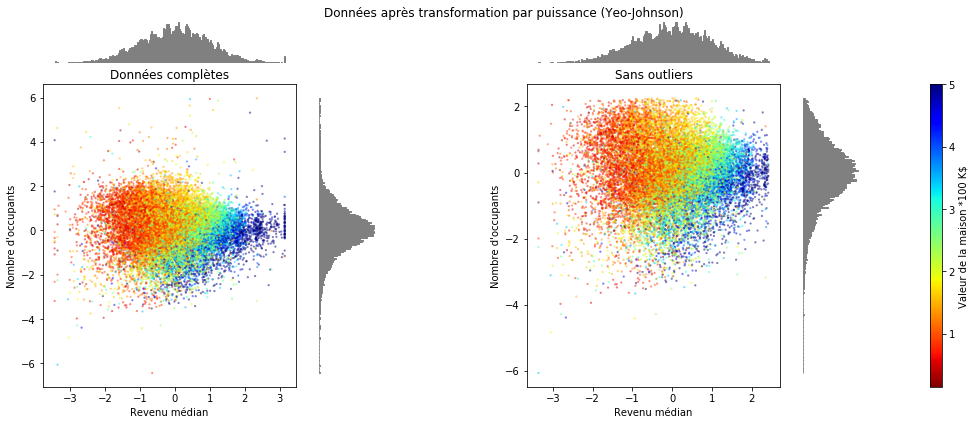

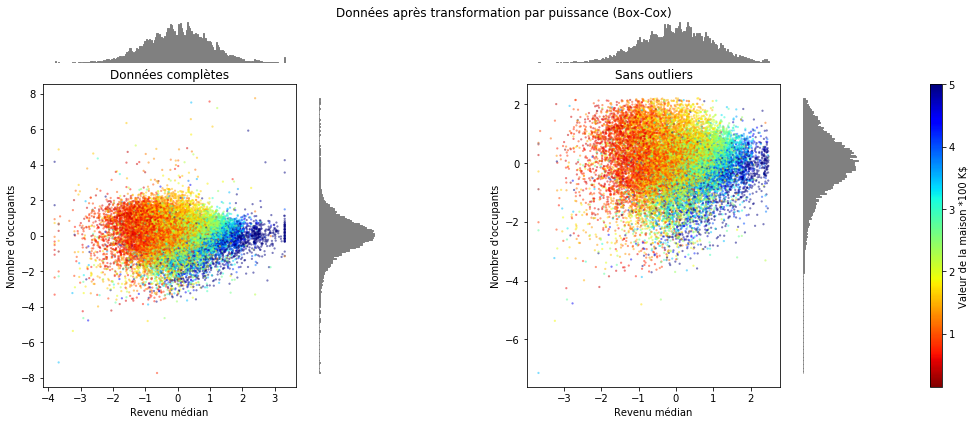

In [7]:
from sklearn.preprocessing import PowerTransformer
data = ('Données après transformation par puissance (Yeo-Johnson)', PowerTransformer(method='yeo-johnson').fit_transform(X))
make_plot(*data)
data = ('Données après transformation par puissance (Box-Cox)', PowerTransformer(method='box-cox').fit_transform(X))
make_plot(*data)

#### Transformation par quantile

La fonction de densité cumulée d'une variable est utilisée pour projeter les valeurs originales (à l'intérieur d'une plage de valeurs) vers de nouvelles valeurs ayant une distribution spécifique. Les valeurs originales hors de la plage seront projetées aux limites de la distribution en sortie. Notez que cette transformation est non linéaire. Cela peut fausser les corrélations linéaires entre les variables mesurées à la même échelle, mais rend les variables mesurées à différentes échelles plus directement comparables.


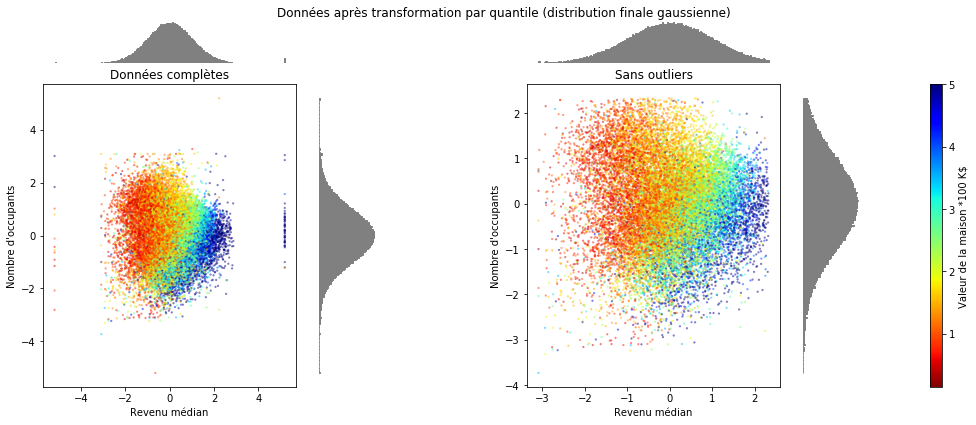

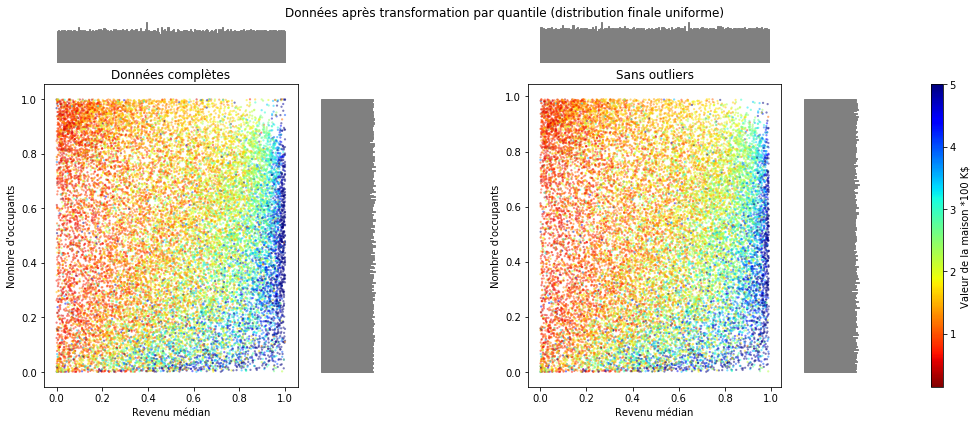

In [8]:
from sklearn.preprocessing import QuantileTransformer

data = ('Données après transformation par quantile (distribution finale gaussienne)', QuantileTransformer(output_distribution='normal').fit_transform(X))
make_plot(*data)
data = ('Données après transformation par quantile (distribution finale uniforme)', QuantileTransformer(output_distribution='uniform').fit_transform(X))
make_plot(*data)


#### Normalisation 
 
Pour rappel : $x_i = \frac{x_i}{ ||x_i|| }$

La mise à l'échelle des entrées, au moyen de la norme du vecteur d'entrées, est une opération courante pour la classification de texte et l'analyse de cluster. Par exemple, le produit scalaire de deux vecteurs TF-IDF normalisés en $L_2$ correspond à leur métrique de similarité cosinus. C'est la métrique de base pour le modèle d'espace vectoriel couramment utilisé par la communauté de récupération d'informations (data mining).


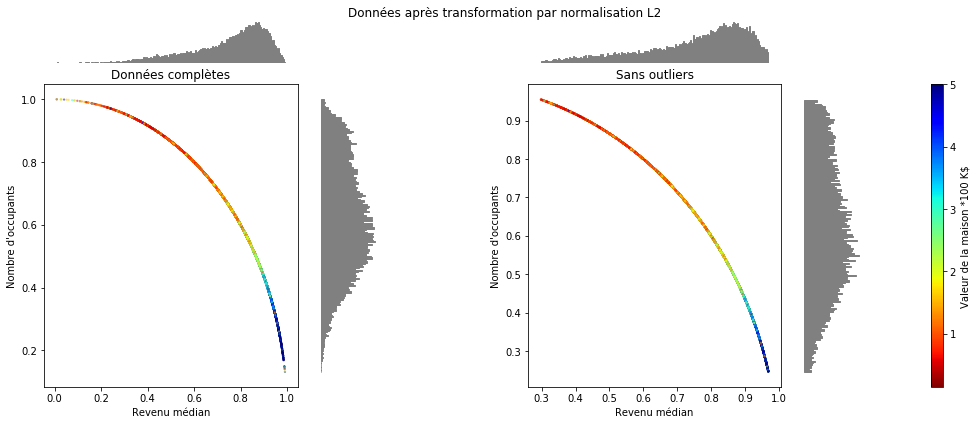

In [9]:
from sklearn.preprocessing import Normalizer
data = ('Données après transformation par normalisation L2', Normalizer().fit_transform(X))
make_plot(*data)

#### Comparaison entre les rééchantillonneurs

Pour mieux comprendre la différence entre eux, voici une visualisation de la caractéristique `Revenu médian` avant et après transformation.


In [10]:
dfX = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dfX = dfX.drop(dataset.feature_names[1:],axis=1)

col = dfX.MedInc.values.reshape(-1, 1)

scalers = [
    ('Standard', StandardScaler()),
    ('Min-Max', MinMaxScaler()),
    ('Max-Abs', MaxAbsScaler()),
    ('Robuste', RobustScaler(quantile_range=(25, 75))),
    ('Quantile (gaussian)', QuantileTransformer(output_distribution='normal')),
    ('Quantile (uniforme)', QuantileTransformer(output_distribution='uniform'))
]

for scaler in scalers:
    dfX[scaler[0]] = scaler[1].fit_transform(col)
    

dfX.describe()

,MedInc,Standard,Min-Max,Max-Abs,Robuste,Quantile (gaussian),Quantile (uniforme)
count,20640.000000,2.064000e+04,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000
mean,3.870671,3.734255e-16,0.232464,0.258043,1.540799e-01,0.004036,0.500000
std,1.899822,1.000024e+00,0.131020,0.126654,8.715378e-01,1.024356,0.288701
min,0.499900,-1.774299e+00,0.000000,0.033326,-1.392252e+00,-5.199338,0.000000
25%,2.563400,-6.881186e-01,0.142308,0.170892,-4.456270e-01,-0.675278,0.249750
50%,3.534800,-1.767951e-01,0.209301,0.235652,1.018608e-16,-0.000163,0.499935
75%,4.743250,4.593063e-01,0.292641,0.316215,5.543730e-01,0.674159,0.749895
max,15.000100,5.858286e+00,1.000000,1.000000,5.259674e+00,5.199338,1.000000


<Figure size 1080x360 with 0 Axes>

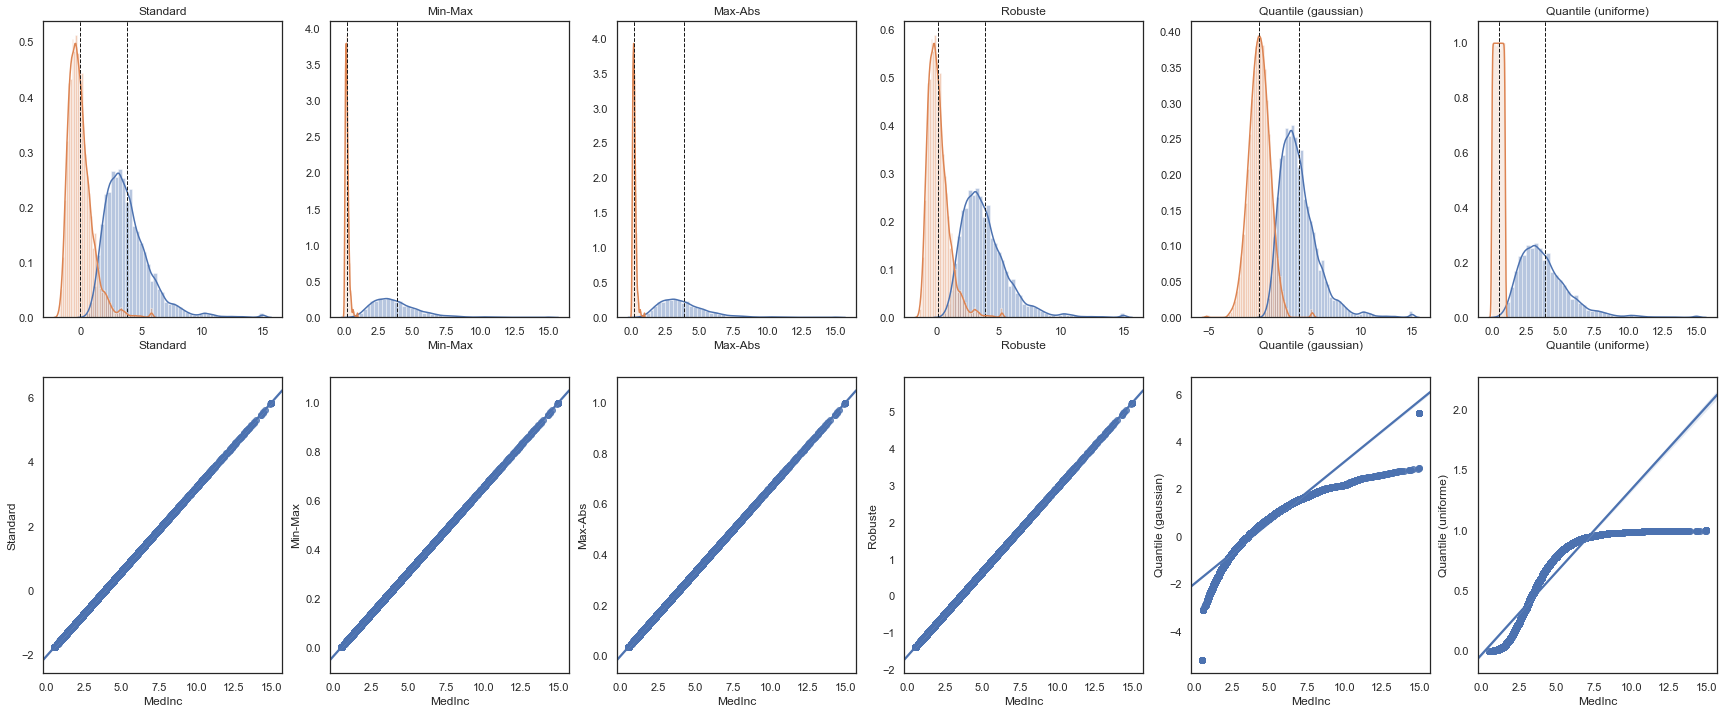

In [11]:
import seaborn as sns
sns.set(style="white", color_codes=True)

plt.figure(figsize=(15,5))

cpt = 1
f = plt.figure(figsize=(30,12))
for scaler in scalers:
    name = scaler[0]
    ax = f.add_subplot(2,len(scalers),cpt)
    
    sns.distplot(dfX.MedInc,ax=ax)
    ax.axvline(dfX.MedInc.mean(), color='k', linestyle='dashed', linewidth=1)
    sns.distplot(dfX[name],ax=ax)
    ax.axvline(dfX[name].mean(), color='k', linestyle='dashed', linewidth=1)
    ax.set_title(name)

    ax = f.add_subplot(2,len(scalers),cpt+len(scalers))
    g = sns.regplot(x="MedInc", y=name, data=dfX,ax=ax)
    cpt+=1

### Réduction de la dimensionnalité

Séquence inspirée des exemples de code de la librairie Scikit-Learn de [Fabian Pedregosa](mailto:fabian.pedregosa@inria.fr), [Olivier Grisel](mailto:olivier.grisel@ensta.org), [Mathieu Blondel](mailto:mathieu@mblondel.org), et Gael Varoquaux (License: BSD 3 clause)

In [12]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
n_components = 2

# Fonction pour afficher la projection
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1((y[i]+1) / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Automatically created module for IPython interactive environment


#### Exemples de données

Nous allons utiliser un sous-ensemble de la base de données MNIST qui comprend des images de chiffres 0 à 9 de taille 8x8. On peut considérer qu'à chaque image correspond un point dans un espace de dimension 8*8=64. Il est évidemment impossible de visualiser la distribution des images sous cette forme. On peut toutefois réduire la dimensionnalité de l'espace afin de le projeter dans un sous-espace de dimension 2, nettement plus pratique! Il existe de nombreuses méthodes de projection produisant des résultats variables. Nous allons en explorer plusieurs.  


Text(0.5, 1.0, 'Une sélection des 5 premiers chiffres de la base de données MNIST')

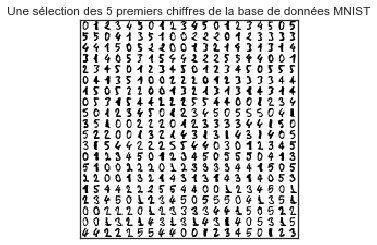

In [13]:
# Affichons quelques images de chiffres pour l'exemple
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Une sélection des 5 premiers chiffres de la base de données MNIST')

#### Projection aléatoire

Wall time: 591 ms


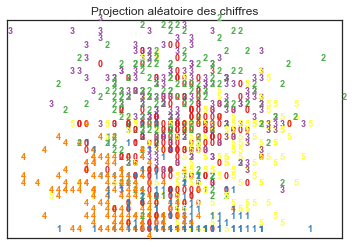

In [14]:
%%time
# Projection aléatoire des chiffres au moyen d'une matrice aléatoire de taille 64x2.
rp = random_projection.SparseRandomProjection(n_components=n_components, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Projection aléatoire des chiffres")

#### Analyse en composante principales (PCA)

Wall time: 1.13 s


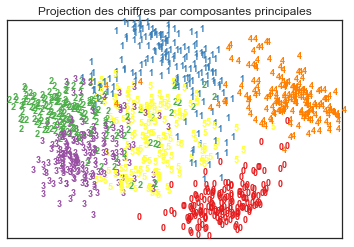

In [15]:
%%time
# Projection des chiffres sur les 2 premiers axes principaux de la matrice de covariance
X_pca = decomposition.PCA(n_components=n_components).fit_transform(X)
plot_embedding(X_pca, "Projection des chiffres par composantes principales")

#### PCA pour données sparses (Latent Sementic)

Wall time: 443 ms


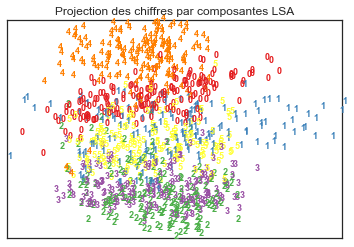

In [16]:
%%time
# Projection des chiffres par les 2 principaux composants LSA (latent semantic analysis) = PCA pour données sparses.
X_pca = decomposition.TruncatedSVD(n_components=n_components).fit_transform(X)
plot_embedding(X_pca, "Projection des chiffres par composantes LSA")

#### Analyse par discriminants linéaires (LDA)

Wall time: 899 ms


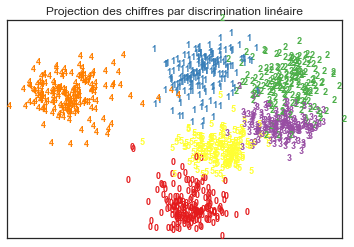

In [17]:
%%time
# Projection des chiffres par les deux principaux discriminants linéaires
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # X doit être inversable ... 
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=n_components).fit_transform(X2, y)
plot_embedding(X_lda, "Projection des chiffres par discrimination linéaire")

#### Isomap

Wall time: 2.26 s


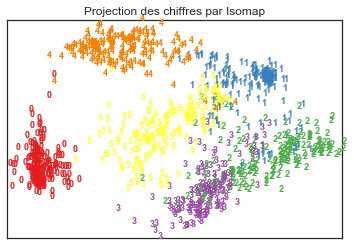

In [18]:
%%time
# Projection des chiffres par Isomap
X_iso = manifold.Isomap(n_neighbors, n_components=n_components).fit_transform(X)
plot_embedding(X_iso, "Projection des chiffres par Isomap")

#### Encodage Locallement Linéaire (LLE)

Wall time: 1.48 s


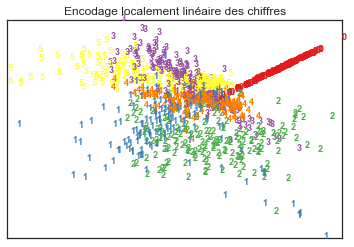

In [19]:
%%time
# Encodage localement linéaire des chiffres
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=n_components, method='standard')
X_lle = clf.fit_transform(X)
plot_embedding(X_lle, "Encodage localement linéaire des chiffres")

#### Alignement des tangentes locales (LSTA)

Wall time: 1.33 s


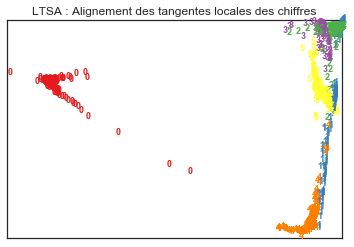

In [20]:
%%time
# LTSA : Alignement des tangentes locales des chiffres
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=n_components, method='ltsa')
X_ltsa = clf.fit_transform(X)
plot_embedding(X_ltsa,
               "LTSA : Alignement des tangentes locales des chiffres")

#### Multidimensional Scaling (MDS)

Wall time: 6.15 s


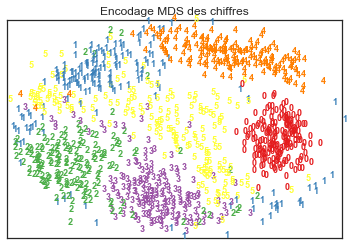

In [21]:
%%time
# Encodage MDS des chiffres
clf = manifold.MDS(n_components=n_components, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plot_embedding(X_mds, "Encodage MDS des chiffres")

#### Forêt d'Isolation

Wall time: 1.09 s


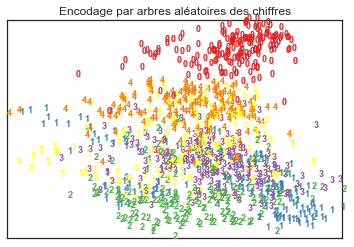

In [22]:
%%time
# Encodage par arbres aléatoires des chiffres
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=n_components)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, "Encodage par arbres aléatoires des chiffres")

#### Encodage Spectral

Wall time: 1.06 s


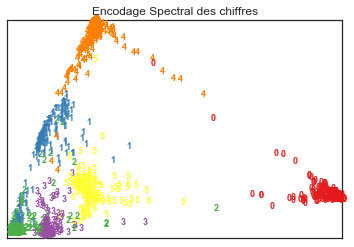

In [23]:
%%time
# Encodage Spectral des chiffres
embedder = manifold.SpectralEmbedding(n_components=n_components, random_state=0, eigen_solver="arpack")
X_se = embedder.fit_transform(X)

plot_embedding(X_se,"Encodage Spectral des chiffres")

#### t-SNE

Wall time: 9.14 s


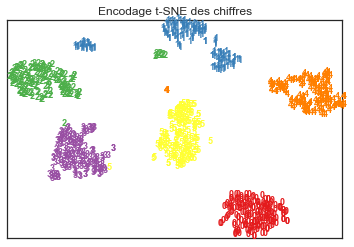

In [24]:
%%time
# Encodage t-SNE des chiffres
# Visualizing : https://github.com/oreillymedia/t-SNE-tutorial
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,"Encodage t-SNE des chiffres")

### Variables catégoriques

**Regroupement de catégories en une seule valeur:**

Exemple: Vous avez une variable catégorielle `pays` qui a 180 valeurs uniques. Vous voulez voir les 3 pays les plus importants seulement et placer tous les autres pays dans une valeur "autre".

```
# Afficher le nombre de valeurs uniques de chaque variable catégorique dans les données
for i in df.columns:
    if df[i].dtypes=='object': 
        unique_cat=len(df[i].unique())
        print("La caractéristique '{i}' a {unique_cat} catégories uniques".format(col_name=col_name, unique_cat=unique_cat))

# Afficher le nombre de valeurs de chaque variable catégorique
print(df['pays'].value_counts())

# Catégoriser les catégories moins fréquentes comme "autres"
def repl(x):
    if x == 'US': return 'US'
    elif x == 'BR': return 'BR'
    elif x == 'ES': return 'ES'
    else: return 'Other'
    
df['pays'] = df['COUNTRY'].apply(repl)
print(df['pays'].value_counts().sort_values(ascending=False))
```

**Regroupement de variables numériques en catégories**

**Catégories de taille égales :**

```
df['var'] = 0
var = pd.qcut(x=COL1, q=3, labels=["good", "medium", "bad"])
print(df['var'].value_counts().sort_values(ascending=False))
```
Ajustez le nombre de catégories (q) et les étiquettes.

**Catégories par intervalles identiques :**

```
bins = [0, 20, 40, 60, 80, 100] 
df.var = pd.cut(x=COL1, bins, labels=['Very low', 'Low', 'Medium', 'High', 'Very high']) 
print(data['var'].value_counts().sort_values(ascending = False))
```
Ajustez les catégories en spécifiant les seuils (doit avoir un de plus que le nombre de catégories/étiquettes). Par défaut, les emplacements incluent le bord le plus à droite; définissez l'argument `right = False` si les limites de droite ne doivent pas être incluses.

### Encoder des variables catégoriques

**Encoder une variable booléenne en la transformant en entier :**

```
df['BOOL'] = (df.COL1=="ABC").astype(int)
dta.head()
```
Dans cet exemple, COL1 contient des valeurs de chaîne. BOOL sera égal à 1 si COL1 contient "ABC".

**Encoder manuellement en mappant un dictionnaire :**

```
dic = {'Yes': 1, 'No': 2}
df['VAR'] = df['VAR'].map(dic)
```

**Encoder automatiquement (OneHot) :**

```
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

```
La colonne devant être encodée est spécifiée dans le constructeur [0] dans l'exemple. Les données `x` sont ensuite transformées avec l’objet onehotencoder. Après ces étapes, il y a maintenant autant de nouvelles colonnes dans le jeu de données que de catégories dans la colonne [0].
